<h1>Анализ формулы один с использованием методов машинного обучения и математической статистики</h1>

<h2>Первоначальной нашей целью будет прогноз вероятности совершения обгона на каждом из участков трассы.</h2>

In [196]:
import fastf1 as ff1
import pandas as pd
import numpy as np
import datetime
import math

ff1.Cache.enable_cache('cache')
session = ff1.get_session(2021, 21, 'R')
quali = ff1.get_session(2021, 21, 'Q')
quali = pd.DataFrame(quali.results)

In [197]:
laps = session.load_laps(with_telemetry=True)
session.load_telemetry()

core           INFO 	Loading laps for Saudi Arabian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['5', '7', '18', '3', '99', '16', '9', '77', '47', '33', '10', '4', '14', '11', '6', '44', '31', '63', '22', '55']
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data


In [199]:
laps[laps['LapNumber'] == 1] # как мы можем заметить, гонщики расположены изначально в их стартовой позиции

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:12.940000,44,NaT,1,1,0 days 00:24:06.512000,NaT,NaT,0 days 00:00:29.642000,0 days 00:00:29.221000,...,300.0,MEDIUM,10.0,False,0 days 01:01:37.514000,Mercedes,HAM,1,False,2021-12-05 17:33:44.732
50,0 days 01:03:13.967000,77,NaT,1,1,0 days 00:24:32.632000,NaT,NaT,0 days 00:00:29.745000,0 days 00:00:29.411000,...,306.0,MEDIUM,8.0,False,0 days 01:01:37.514000,Mercedes,BOT,1,False,2021-12-05 17:33:44.732
100,0 days 01:03:14.620000,33,NaT,1,1,0 days 00:23:02.553000,NaT,NaT,0 days 00:00:29.971000,0 days 00:00:29.298000,...,320.0,MEDIUM,5.0,False,0 days 01:01:37.514000,Red Bull,VER,1,False,2021-12-05 17:33:44.732
150,0 days 01:03:16.198000,16,NaT,1,1,0 days 00:24:46.159000,NaT,NaT,0 days 00:00:30.269000,0 days 00:00:29.491000,...,306.0,MEDIUM,6.0,False,0 days 01:01:37.514000,Ferrari,LEC,1,False,2021-12-05 17:33:44.732
200,0 days 01:03:16.777000,11,NaT,1,1,0 days 00:22:49.707000,NaT,NaT,0 days 00:00:30.085000,0 days 00:00:29.561000,...,318.0,MEDIUM,8.0,False,0 days 01:01:37.514000,Red Bull,PER,1,False,2021-12-05 17:33:44.732
215,0 days 01:03:19.630000,10,NaT,1,1,0 days 00:22:10.504000,NaT,NaT,0 days 00:00:31.107000,0 days 00:00:30.024000,...,310.0,MEDIUM,8.0,False,0 days 01:01:37.514000,AlphaTauri,GAS,1,False,2021-12-05 17:33:44.732
265,0 days 01:03:17.867000,4,NaT,1,1,0 days 00:22:32.733000,NaT,NaT,0 days 00:00:30.408000,0 days 00:00:29.758000,...,304.0,SOFT,5.0,False,0 days 01:01:37.514000,McLaren,NOR,1,False,2021-12-05 17:33:44.732
315,0 days 01:03:22.130000,22,NaT,1,1,0 days 00:21:56.147000,NaT,NaT,0 days 00:00:31.680000,0 days 00:00:30.434000,...,322.0,MEDIUM,8.0,False,0 days 01:01:37.514000,AlphaTauri,TSU,1,False,2021-12-05 17:33:44.732
364,0 days 01:03:18.905000,31,NaT,1,1,0 days 00:23:09.924000,NaT,NaT,0 days 00:00:30.967000,0 days 00:00:29.812000,...,306.0,MEDIUM,8.0,False,0 days 01:01:37.514000,Alpine F1 Team,OCO,1,False,2021-12-05 17:33:44.732
414,0 days 01:03:21.583000,99,NaT,1,1,0 days 00:23:27.398000,NaT,NaT,0 days 00:00:31.534000,0 days 00:00:30.717000,...,303.0,MEDIUM,7.0,False,0 days 01:01:37.514000,Alfa Romeo,GIO,1,False,2021-12-05 17:33:44.732


In [200]:
laps['LapEndTime'] = laps['LapStartTime'] + laps['LapTime']

Сделаем подготовку данных для просчета обгонов
Отберем для каждого гонщика те записи, где менялся гонщик впереди, аналогичные же записи отберем для других гонщиков

<h3> Дальнейшая работа и алгоритм вычисления места обгона </h3>
Алгоритм следующий: для каждого гонщика считается его текущая позиция в каждый момент предполагаемого обгона. Обгон засчитывается, если позиция не была возвращена до конца круга, аналогично в дальнейших версиях алгоритма стоит исключить обгоны из-за заездов на питстоп. Таким образом, алгоритм будет следующим:
<ol style="color: green">
<li>Посчитать сетку на конец круга</li>
<li>Найти смены позиций, если таковые были</li>
<li>Найти где была произведена окончательная смена позиций</li>
<li style="color: red">Выделить места борьбы за место</li>
</ol>

Что считается обгоном: <a href="https://www.motorsport.com/f1/news/overtaking-records-in-f1-most-overtakes-in-a-race-by-a-driver/6718440/">motorsport.com</a>

Чуть более подробно по пунктам:
Первоначальная расстановка берется исходя из квалификации ( данный момент в процессе доработки, т.к. после квалификации перед гонкой могут происходить перестановки )
Далее алгоритм:
1. Берется расстановка на начало круга ( конец предыдущего ) и конец круга
2. Вычисляется массив вида: a = <a style="color: yellow">[1, -1, 0, 2, 0, -2 ... ]</a>, где в каждой ячейке стоит число n - количество потерянных / выигранных позиций относительно начала круга.
3. Находится первый отрицательный элемент в массиве, назовем его <i>x</i>, тогда предыдущие abs(<i>x</i>) элементов - гонщиков, которые пропустили нашего, у предыдущих <i>x</i> элементов вычитается по единице, сам элемент x обнуляется
4. вычисляются <i>x</i> гонщиков впереди, далее: y - рассматриваемый обогнавший гонщик, количество возможных значений <i>y</i>: abs(<i>x</i>)
5. ищется наименьшее время, когда для обгоняемого гонщика ( с <i>x</i> потерянных позиций ), гонщик <i>y</i> оказался впереди, берется X и Y этой позиции и записывается один обгон

Пример:
[22, 11, 10] - номера гонщиков и их расположение на начало круга
[10, 11, 22] - номера гонщиков и их расположение на конец круга

тогда нужный нам массив смены мест:
[2, 0, -2],
первый отрицательный элемент = -2, тогда:
1. ищем обгон 22'ого гощника 10'ым
2. ищем обгон 22'ого гонщика 11'ым

массив смены мест после этого:
[1, -1, 0]
Первый отрицательный элемент = -1, тогда:
1. ищем обгон 11'ого гонщика 10'ым

<a style="color: grey"> Под поиском обгона подразумевается алгоритм нахождения под пунктом 5, а именно выделение наименьшего времени</a>

In [230]:
def get_starting_grid(laps_data, quali_data):
    quali_grid = quali_data['number'].tolist()
    race_starting = []
    for driver in range(len(quali_grid)):
        try:
            _ = laps_data.pick_driver(quali_grid[driver]).get_telemetry()
            race_starting.append(quali_grid[driver])
        except Exception as _:
            pass
    return np.array(race_starting)

def calculate_lap_grid(data, lap_num):
    return data[data['LapNumber'] == lap_num].sort_values(by=['LapEndTime'])

def get_position_of_overtake(data, overtaken_driver, driver):
    driver_data = data.pick_driver(overtaken_driver).get_telemetry()
    index = driver_data[driver_data['DriverAhead'] == driver].index.min()
    return [None, None] if np.isnan(index) else [driver_data.loc[[index]].iloc[0]['X'], driver_data.loc[[index]].iloc[0]['Y']]

def find_and_process_overtake(grid_to_process, data, lap_number):
    overtaken_driver = grid_to_process[-1]
    lap_data = data[data['LapNumber'] == lap_number]
    overtakes = []
    for driver in grid_to_process[:-1]:
        x, y = get_position_of_overtake(lap_data, overtaken_driver, driver)
        if x is not None:
            overtakes.append([x, y])
    return overtakes

def calculate_overtakes(grid_to_process, difference_in_grid, data, lap_number):
    overtakes_to_find = []
    i = 0
    while i < len(difference_in_grid):
        if difference_in_grid[i] < 0:
            overtakes_to_find += (find_and_process_overtake(grid_to_process[i + difference_in_grid[i]:i + 1], data, lap_number))
            difference_in_grid[i + difference_in_grid[i]:i] += np.full(len(difference_in_grid[i + difference_in_grid[i]:i]), -1)
            difference_in_grid[i] = 0
            difference_in_grid = np.array(list(difference_in_grid[:i + difference_in_grid[i]]) + list(difference_in_grid[i + difference_in_grid[i]:i]) + list(difference_in_grid[i:]))
            i += difference_in_grid[i] - 1
        i += 1
    return overtakes_to_find

In [231]:
previous_grid = np.array(get_starting_grid(laps, quali))
overtakes = []
for i in range(1, laps['LapNumber'].max() + 1):
    transition_grid = dict(zip(previous_grid, np.arange(1, len(previous_grid) + 1)))
    previous_grid = np.arange(1, len(previous_grid) + 1)
    current_grid = calculate_lap_grid(laps, i)['DriverNumber'].to_list()
    previous_grid = current_grid
    current_grid = np.array([transition_grid[driver] for driver in current_grid])
    difference = current_grid - np.array(sorted(current_grid))
    overtakes += calculate_overtakes(previous_grid, difference, laps, i)

In [171]:
overtakes

[[872, 2115],
 [736, 2100],
 [745, 2102],
 [756, 2103],
 [2003, -3808],
 [2439, -1362],
 [851, 2114],
 [-1885, 614],
 [106, 1870],
 [802, 1957],
 [3521, 2295],
 [1508, 2045],
 [1590, -3467],
 [-195, 1836],
 [-129, 2028],
 [2017, 2108],
 [2293, 2143],
 [2429, 2159],
 [2449, 2163],
 [2450, 2162],
 [2491, 2168],
 [3076, 2240],
 [4270, 2965],
 [930, 1973],
 [1675, 2066],
 [2029, 2110],
 [2208, 2132],
 [2209, 2133],
 [3149, 2249],
 [1411, 2033],
 [3845, 2330],
 [-240, 1831],
 [-587, 5527],
 [-2174, 851],
 [312, 1896],
 [684, 1943],
 [1151, 2001],
 [2292, 2142],
 [2557, 2175],
 [1993, 2106],
 [3535, 2297],
 [4510, 2455],
 [4204, 3253],
 [1492, 2043],
 [2887, 2216],
 [2920, 2220],
 [2948, 2224],
 [2921, 2220],
 [1291, 2018],
 [1719, 2071],
 [1734, 2073],
 [1735, 2074],
 [2220, 2134],
 [3322, 2271],
 [3977, 2347],
 [4445, 2751],
 [2209, 2132],
 [2413, 2158],
 [4482, 2430],
 [4488, 2707],
 [4691, -5214],
 [-2153, 661],
 [564, -2602],
 [88, 7395],
 [4583, -5172],
 [-218, 1834],
 [4661, -5202],
 

## Посмотрим на визуализацию мест обгонов на одной конкретной трассе за разные года. Для этого выберем трассу которая не менялась с 2014 года.
 <i style="color: #ff2800"> небольшое уточнение, все координаты представлены в 1/10 метра, мы разделим всю трассу на зоны

In [203]:
x_size_of_sector = 50
y_size_of_sector = 50

<h2> Давайте создадим нашу трассу </h2>

In [212]:
def num_of_overtakes_in_segment(point, overtakes_df):
    return len(overtakes_df[(overtakes_df['X'] == math.floor(point['X'] // 10  // x_size_of_sector)) & (overtakes_df['Y'] == math.floor(point['Y'] // 10 // y_size_of_sector))])

lap = laps.pick_fastest()
tel = lap.get_telemetry()

x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

overtakes_to_display = pd.DataFrame({"X": x, "Y": y})
overtakes_to_process = pd.DataFrame({"X": [x[0] for x in overtakes], "Y": [x[1] for x in overtakes]})
print(overtakes_to_process)
overtakes_to_process['X'] = overtakes_to_process['X'].apply(lambda i: math.floor(i // 10  // x_size_of_sector))
overtakes_to_process['Y'] = overtakes_to_process['Y'].apply(lambda i: math.floor(i // 10  // x_size_of_sector))
print(overtakes_to_process)
overtakes_to_display['nOvertakes'] = overtakes_to_display.apply(lambda i: num_of_overtakes_in_segment(i, overtakes_to_process), axis=1)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

        X     Y
0   -1348   376
1   -2576  4096
2   -1398   510
3   -2498  3814
4   -2830  4701
..    ...   ...
100 -2159  2586
101 -1929  1957
102 -1467 -4910
103 -2266  2957
104 -2586  4130

[105 rows x 2 columns]
     X   Y
0   -3   0
1   -6   8
2   -3   1
3   -5   7
4   -6   9
..  ..  ..
100 -5   5
101 -4   3
102 -3 -10
103 -5   5
104 -6   8

[105 rows x 2 columns]


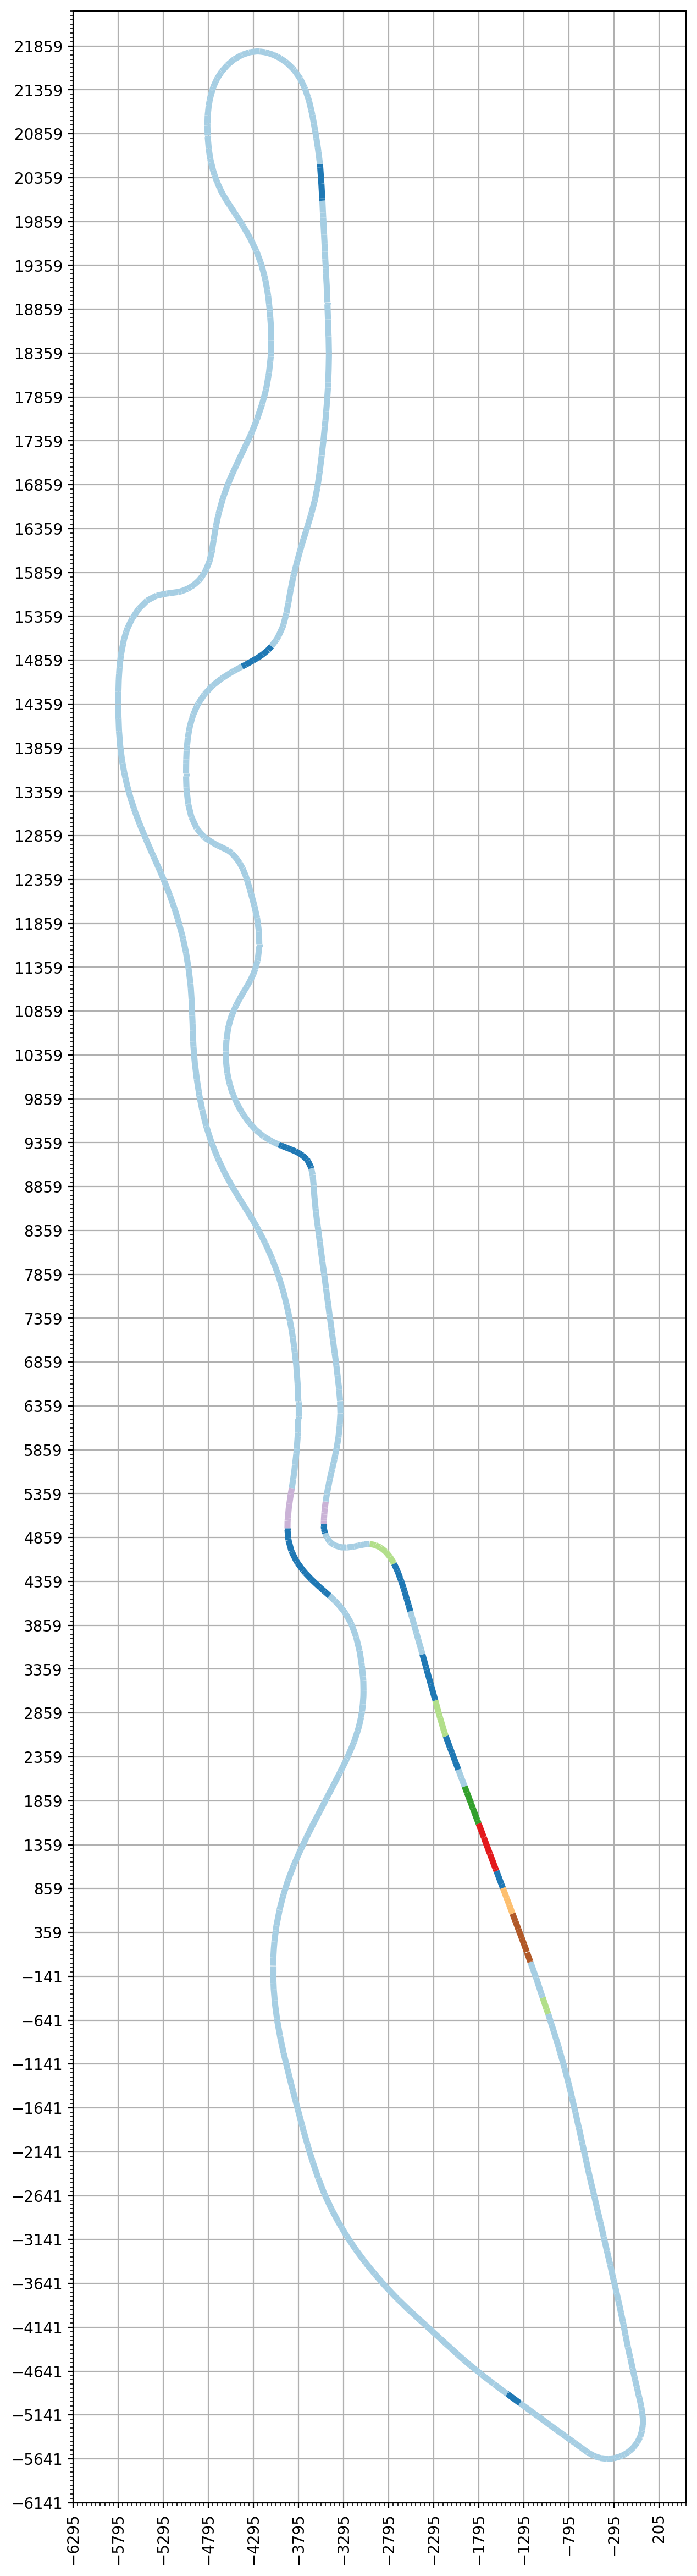

In [229]:
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.pyplot as plt

max_x = overtakes_to_display['X'].max() + 500
min_x = overtakes_to_display['X'].min() - 500
max_y = overtakes_to_display['Y'].max() + 500
min_y = overtakes_to_display['Y'].min() - 500

fig,ax = plt.subplots(figsize=(30 * (max_x + abs(min_x)) / (max_y + abs(min_y)), 30), dpi=200)

overtake = overtakes_to_display['nOvertakes'].to_numpy().astype(float)

cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(overtake)
lc_comp.set_linewidth(4)
ax.add_collection(lc_comp)

major_ticks_x = np.arange(min_x, max_x, 10 * x_size_of_sector)
minor_ticks_x = np.arange(min_x, max_x, x_size_of_sector)

major_ticks_y = np.arange(min_y, max_y, 10 * y_size_of_sector)
minor_ticks_y = np.arange(min_y, max_y, y_size_of_sector)

ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)
plt.grid()
plt.xticks(rotation=90)
plt.show()